## Gudhi Python 

Taken from http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA/Tuto-Part1.html

In [1]:
import numpy as np
import pandas as pd
import pickle as pickle
import gudhi as gd
from pylab import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from sklearn.neighbors.kde import KernelDensity
%matplotlib inline

In [2]:


f = open("data_acc","rb")
data = pickle.load(f, encoding='latin1')
f.close()


In [4]:
data_A = data[0]
data_B = data[1] 
data_C = data[2]
label = data[3]
print(data_A)

[array([[ 1.801000e-03,  1.997482e+00,  6.047360e-01],
       [-3.239400e-02,  9.229130e-01,  8.370360e-01],
       [ 5.592350e-01,  1.292526e+00,  3.323400e-02],
       [ 5.711210e-01,  5.052950e-01,  8.134610e-01],
       [ 2.903290e-01,  5.343020e-01, -3.863830e-01],
       [ 2.764900e-02,  1.359772e+00, -4.708560e-01],
       [ 8.158900e-02,  9.172970e-01, -4.600500e-02],
       [ 4.055940e-01,  6.817930e-01,  1.236000e-02],
       [ 2.532500e-01,  8.607030e-01, -1.399840e-01],
       [ 1.822200e-01,  8.936920e-01, -5.159000e-02],
       [ 1.681370e-01,  9.912410e-01,  8.136000e-02],
       [ 6.547500e-02,  9.792630e-01, -5.892900e-02],
       [ 1.760560e-01,  1.064560e+00,  9.756500e-02],
       [ 1.102600e-01,  1.148727e+00, -4.586800e-02],
       [ 2.021800e-02,  1.197784e+00,  4.322800e-02],
       [ 3.116760e-01,  1.492188e+00, -3.605700e-02],
       [ 4.667820e-01,  1.171539e+00,  2.189790e-01],
       [ 8.939060e-01,  1.139908e+00, -3.294680e-01],
       [ 5.869140e-01,  1.2

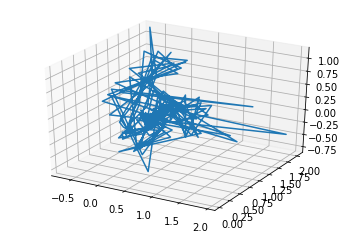

In [7]:
data_A_sample = data_A[0]
plt.gca(projection='3d')
plt.plot(data_A_sample [:,0],data_A_sample [:,1],data_A_sample [:,2] )


In [8]:
Rips_complex_sample = gd.RipsComplex(points = data_A_sample,max_edge_length=0.8 )

In [9]:
Rips_simplex_tree_sample = Rips_complex_sample.create_simplex_tree(max_dimension=3) 

In [10]:
diag_Rips = Rips_simplex_tree_sample.persistence()
diag_Rips

[(2, (0.2707418270862484, 0.27852532247894446)),
 (2, (0.08944134726735724, 0.09472462873508666)),
 (2, (0.16968193755081898, 0.17340039773022436)),
 (1, (0.3534578242152804, 0.5171918008920868)),
 (1, (0.35989348040218777, 0.43792058215845486)),
 (1, (0.6310080748247203, 0.6989516825425058)),
 (1, (0.29707865139218603, 0.35739910582148915)),
 (1, (0.16630172892366454, 0.21909549145749213)),
 (1, (0.36778574664198166, 0.41938362742481966)),
 (1, (0.15947094292378158, 0.20996904058932123)),
 (1, (0.12252187341858596, 0.16926603170748702)),
 (1, (0.21594797347740963, 0.2623847858260841)),
 (1, (0.21018997407107687, 0.25408370937547337)),
 (1, (0.18577813421659717, 0.22761378217278497)),
 (1, (0.13256542889456518, 0.17198706625208782)),
 (1, (0.16044224399764548, 0.19979830087866113)),
 (1, (0.2515107495714646, 0.28562327779437024)),
 (1, (0.27734829949000955, 0.3110214452477514)),
 (1, (0.22306854678775304, 0.24895400765201586)),
 (1, (0.41003432731175093, 0.43518548084581127)),
 (1, (0.

In [11]:
Rips_simplex_tree_sample.persistence_intervals_in_dimension(0)


[(0.0, 0.015547225443788979),
 (0.0, 0.01663540423314082),
 (0.0, 0.01690599869868692),
 (0.0, 0.018364641052849354),
 (0.0, 0.020296831944911983),
 (0.0, 0.022302677619514665),
 (0.0, 0.02453242788637115),
 (0.0, 0.025497774589167563),
 (0.0, 0.02690871505665029),
 (0.0, 0.02814014223489274),
 (0.0, 0.02974013317051562),
 (0.0, 0.030012806549871367),
 (0.0, 0.03136645649415944),
 (0.0, 0.033575970946496926),
 (0.0, 0.03719660733185202),
 (0.0, 0.0381425573605127),
 (0.0, 0.03893053683164409),
 (0.0, 0.040321104027543644),
 (0.0, 0.042012080941081734),
 (0.0, 0.04242459421137696),
 (0.0, 0.04289086930804741),
 (0.0, 0.04407876315188525),
 (0.0, 0.04408758008782069),
 (0.0, 0.04443292515691491),
 (0.0, 0.04553469447575112),
 (0.0, 0.04574153015586604),
 (0.0, 0.04781555652713873),
 (0.0, 0.04820666541050107),
 (0.0, 0.04903837087424498),
 (0.0, 0.04907053092233666),
 (0.0, 0.04932105628430927),
 (0.0, 0.04939531997062072),
 (0.0, 0.04944693096644125),
 (0.0, 0.04945568287871474),
 (0.0,

<module 'matplotlib.pyplot' from '/Users/cmcneile/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

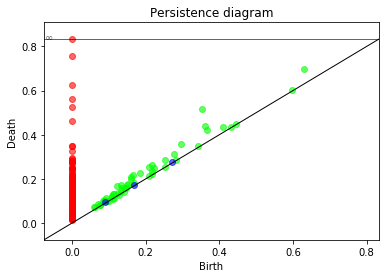

In [9]:
gd.plot_persistence_diagram(diag_Rips)